## 调库

In [20]:
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname="/System/Library/Fonts/Supplemental/Songti.ttc")
    #?fname后是字体的位置

## 加载数据集

In [21]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))])
train_dataset = datasets.MNIST(root='../dataset/mnist/',train=True,download=True,transform=transform)
batch_size = len(train_dataset)
test_dataset = datasets.MNIST(root='../dataset/mnist',train=False,download=True,transform=transform)
train_loader = DataLoader(train_dataset,shuffle=True,batch_size=batch_size)
test_loader = DataLoader(test_dataset,shuffle=False,batch_size=batch_size)

x_train , y_train = next(iter(train_loader))
x_test , y_test = next(iter(test_loader))

#hs 把tensor转为array
x_train , y_train = x_train.cpu().numpy() , y_train.cpu().numpy()
x_test , y_test = x_test.cpu().numpy() , y_test.cpu().numpy()

#hs 改结构
x_train = x_train.reshape(x_train.shape[0],784)
x_test = x_test.reshape(x_test.shape[0],784)

m , p = x_train.shape   #? m:训练集数量    p:特征维度数
print('原本特征维度数:',p)

原本特征维度数: 784


#### next( )
> - next() 返回迭代器的下一个项目
> - next() 函数要和生成迭代器的`iter()`函数一起使用
#### 语法
` next(iterable[,default]) `
#### 参数
> - iterable - 可迭代对象
> - default - 可选，用于设置在没有下一个元素时返回该默认值，如果不设置，又没有下一个元素则会出现Stoplteration异常
#### 备注
> - list、tuple等都是可迭代对象，我们可以通过`iter()函数`获取这些可迭代对象的迭代器。然后我们可以对获取到的迭代器不断使用`next()函数`来获取下一条数据    
> - `iter()函数`实际上是调用了课迭代对象的iter方法

In [22]:
model_1 = PCA(n_components=0.95)
lower_1_dimensional_data = model_1.fit_transform(x_train)

> - n_components是>=1的整数时，表示期望PCA降维后的特征维度数
> - n_components是[0,1]的数字时，表示主成分的方差和所占的最小比例阈值，PCA类自己根据样本特征方差来决定降维到的维度

In [23]:
print('降维后的特征维度数：',model_1.n_components_)

降维后的特征维度数： 154


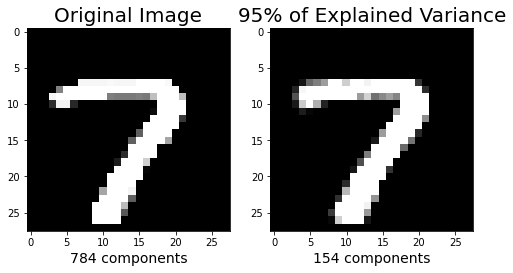

In [24]:
approximation = model_1.inverse_transform(lower_1_dimensional_data) #? 将降维后的数据转换成原始数据
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(
           x_train[1].reshape(28,28),
           cmap = plt.cm.gray,
           interpolation = 'nearest',
           clim = (0,1))
plt.xlabel(f'{x_train.shape[1]} components',fontsize = 14)
plt.title('Original Image',fontsize = 20)

plt.subplot(1,2,2)
plt.imshow(
           approximation[1].reshape(28,28),
           cmap = plt.cm.gray,
           interpolation = 'nearest',
           clim = (0,1))
plt.xlabel(f'{model.n_components_} components',fontsize = 14)
plt.title('95% of Explained Variance',fontsize = 20)
plt.show()

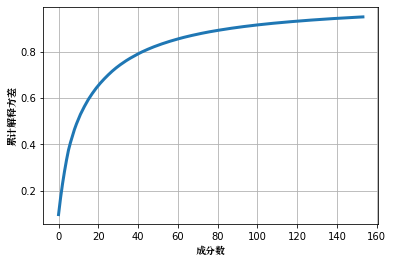

In [25]:
plt.plot(np.cumsum(model_1.explained_variance_ratio_),linewidth=3)
plt.xlabel('成分数',fontproperties=my_font)
plt.ylabel('累计解释方差',fontproperties=my_font);plt.grid(True)

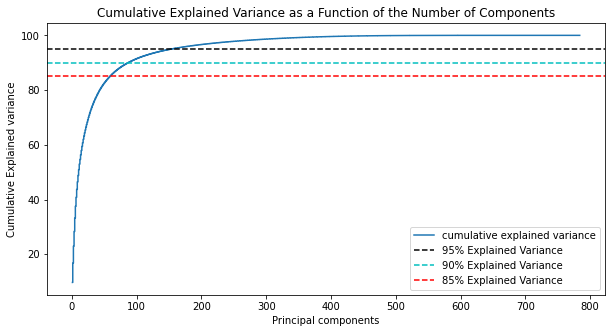

In [27]:
model_2 = PCA() #? 这里需要分析所有的主成分，所以不降维
model_2.fit(x_train)
tot = sum(model_2.explained_variance_)
var_exp = [(i/tot)*100 for i in sorted(model_2.explained_variance_,reverse = True)]
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize=(10,5))
plt.step(range(1,p+1) , cum_var_exp , where='mid' , label = 'cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

#### numpy.cumsum()
> ##### numpy.cumsum(a,axis=None,dtype=None,out=None)
>> - axis=0,按照行累加
>> - axis=1,按照列累加
>> - axis不给定具体值，就把numpy数组当成一个一维数组

In [29]:
def explained_variance(percentage, images): 
    model = PCA(percentage)
    model.fit(images)
    components = model.transform(images)
    approx_original = model.inverse_transform(components)   #? 降维后还原的图片
    return approx_original,model.n_components_

plt.figure(figsize=(8,10));
percentages = [784,0.99,0.95,0.90]

for i in range(1,5):
    plt.subplot(2,2,i)
    im, n_components = explained_variance(percentages[i-1], x_train)
    im = im[5].reshape(28, 28) 
    plt.imshow(im,cmap = plt.cm.gray, interpolation='nearest',clim=(0,1))
    plt.xlabel(f'{n_components} Components', fontsize = 12)
    if i==1:
        plt.title('Original Image', fontsize = 14)
    else:
        plt.title(f'{percentages[i-1]*100}% of Explained Variance', fontsize = 14)
plt.show()